# Objective: Understand how to overlay pyplot hist objects

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# How does this work? the n, bins, patches part?
https://stackoverflow.com/questions/23617129/matplotlib-how-to-make-two-histograms-have-the-same-bin-width
recurring with colors for hist:
https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-legend

In [2]:
#Peak VCD per D42 bioreactor for experiment and control 
exp = [42.62, 54.55, 62.75, 62.4, 53.29, 60.7, 21.37, 35.56, 18.51, 36.54, 43.38, 15.91, 25.12, 22.2, 34.68,
       47.89, 41.09, 43.8, 27.3, 35.38, 72.46, 33.51, 22.96, 48.92, 64.26, 18.83, 8.59, 24.63, 28.36, 29.63, 
       28.47, 43.18, 30.89, 24.19, 21.52, 31.11, 40.76, 31.94, 34.82, 7.45, 19.9]
control = [29.97, 30.32, 48.28, 30.95, 27.34, 31.37, 35.77, 29.25]

#### Converting lists of data to DF attempt 1

Problem: Cannot convert lists of different lengths into a dataframe 

In [3]:
#long solution: convert to dict of series manually then to dataframe 
exp_series = pd.Series(exp)
control_series = pd.Series(control)

series_dict = {"a":exp_series,
              "b":control_series}

#Dataframe came make dataframes from Series dtypes that are not the same length but not from lists 
df_data = pd.DataFrame(series_dict)

In [4]:
#more concise way, use dict comprehension to convert dict of lists to dict of series then to dataframe 

data_dict = {"exp": exp,
            "control": control}

series_dict_1 = {k: pd.Series(v) for k,v in data_dict.items()}
df_data_1 = pd.DataFrame(series_dict_1)


#### Converting lists of data to DF attempt 2

Problem: joined dataframe may work for historgrams in this case, but want to be able to have 1 data column and descriptive column, then group and plot

In [5]:
# long solution: manually create extra column with type of data then concat, reset index and drop old index 

In [6]:
#manual series to dataframe and manual add of type column
df_test_exp = pd.DataFrame(exp_series, columns = ["vcd"])
df_test_exp["type"] = "exp"

df_test_control = pd.DataFrame(control_series, columns = ["vcd"])
df_test_control["type"] = "control"

df_merged = pd.concat([df_test_control, df_test_exp]) #glue together on axis = 0

df_merged.reset_index(inplace = True, drop = True) #reset index and drop old index and done!

### OK now need to plot the histograms

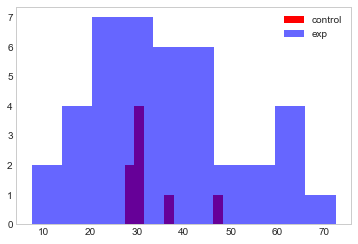

In [7]:
#Using matplotlib to overlay plots with color transperancy 
# I can easily control the color of each subplot 


plt.hist(df_merged[df_merged["type"] == "control"]["vcd"], label ="control", color = "red")
plt.hist(df_merged[df_merged["type"] == "exp"]["vcd"], label = "exp", alpha = 0.6, color = "b")
plt.legend()

type
control    AxesSubplot(0.125,0.125;0.775x0.755)
exp        AxesSubplot(0.125,0.125;0.775x0.755)
Name: vcd, dtype: object

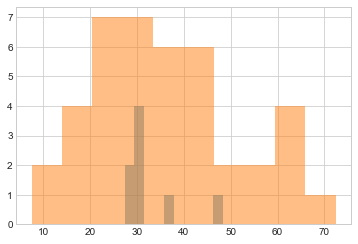

In [8]:
# Using pandas and groupby, I dont know how to control the color of each group

df_merged.groupby("type")["vcd"].hist(alpha = 0.5,)

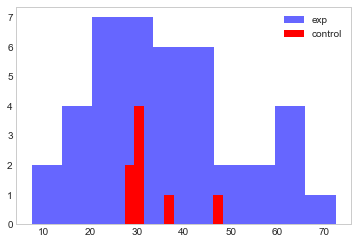

In [9]:
#PLaying with the order of plots
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df_merged[df_merged["type"] == "exp"]["vcd"], label = "exp", alpha = 0.6, color = "b")
ax.hist(df_merged[df_merged["type"] == "control"]["vcd"], label ="control", color = "red")

plt.legend()

In [ ]:
df_merged.hist()

### To learn 

How to generally interacts with the pandas plots 
- how to change color on the pandas plots 
- how to change titles on the pandas plots 

How to set plot styles to be seaborn like but without background or grid 

How to create grouped overlayed histograms for every feature


links:
https://stackoverflow.com/questions/23617129/matplotlib-how-to-make-two-histograms-have-the-same-bin-width
^ whats up with n bins batches?
https://stackoverflow.com/questions/35878064/plot-two-histograms-on-the-same-graph-and-have-their-columns-sum-to-100
^generic histogram plot

In [11]:
pwd

'C:\\Users\\agilman\\Desktop\\Repositories\\Gilman_earning\\Python_tutorials'

In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B00E-A2AB

 Directory of C:\Users\agilman\Desktop\Repositories\Gilman_earning\Python_tutorials

11/08/2018  08:33 AM    <DIR>          .
11/08/2018  08:33 AM    <DIR>          ..
11/01/2018  07:57 AM    <DIR>          .ipynb_checkpoints
11/01/2018  07:54 AM            10,914 2016_11_28_learning_about_classes.ipynb
11/01/2018  07:54 AM            35,134 2016_11_29_Groupby_and_indexing.ipynb
11/01/2018  07:54 AM             8,484 2016_11_29_Learning_about_classes .ipynb
11/01/2018  07:54 AM           236,306 2017_01_23_pyplot_dual_interface_and_ovarlay_plots_for_multiple_y_axis.ipynb
11/01/2018  07:54 AM           268,604 2017_01_26_Nested_for_loops_itterate_across_rows_for_difference_in_sums_across_pairs_of_rows.ipynb
11/01/2018  07:54 AM         2,586,027 2017_01_26_Nested_for_loops_itterate_across_rows_for_pairwise_difference_in_sums_generators_iterators_yield.ipynb
11/01/2018  07:54 AM            16,385 2017_02_16_Function_wit

In [13]:
df = pd.read_csv("D42-CHR-0060 DOE JMP 100418 Day14Subset.csv")

In [14]:
df_outputes = df.iloc[:,8:20]

In [15]:
df_outputes = pd.concat([df_outputes, df["Cond"]], axis = 1)

In [16]:
df_outputes.columns

Index(['Peak VCD (10E6 c/mL)', 'D14 Viability (%)', 'Titer (g/L)',
       'qP (pg/c/day)', 'nrCE Main Peak (%)', 'nrCE Other Peaks (%)',
       'rCE H+L (%)', 'rCE Other peaks (%)', 'SEC HMW (%)', 'SEC Main (%)',
       'SEC LMW (%)', 'M5 (%)', 'Cond'],
      dtype='object')

### Objective: Create a function that plots histograms for every column in a dataframe that is grouped by

In [33]:
df_0 = df_outputes.iloc[:,:-1]
type(df_outputes.iloc[:,:-1])

pandas.core.frame.DataFrame

In [38]:
df_1 = pd.DataFrame(df_outputes.iloc[:,-1])
df_1 = pd.DataFrame(df_1)
type(df_outputes.iloc[:,-1])

pandas.core.series.Series

In [35]:
df_outputes["Cond"].unique()

array(['control', 'Exp', 'poop'], dtype=object)

In [97]:
cond = df_outputes["Cond"].unique()

In [98]:
cond

array(['control', 'Exp', 'poop'], dtype=object)

In [133]:
some_list = ["blue","crimson", "green", "cyan", "violet", "orange", "lime", "gold"]

In [105]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [110]:
np.arange(0,100,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [111]:
np.arange(0,10,1)**2

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801], dtype=int32)

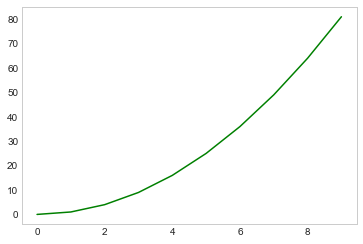

In [121]:
fig = plt.figure()

plt.plot(np.arange(0,10,1), np.arange(0,10,1)**2, color = some_list[3])

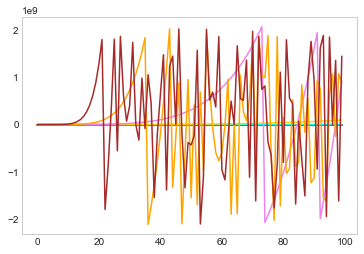

In [114]:
fig = plt.figure()

for i, color in zip(range(8), some_list):
    x = np.arange(0,100,1)
    y = x**i
    
    plt.plot(x,y, color = color)
    

In [102]:
for i,j in zip(cond,some_list):
    print("this is i: ", i)
    print("this is j: ", j)

this is i:  control
this is j:  red
this is i:  Exp
this is j:  blue
this is i:  poop
this is j:  green


In [ ]:
plot.tick_params(axis='both', which='major', labelsize=10)
plot.tick_params(axis='both', which='minor', labelsize=8)

In [190]:
def grouped_histograms(df_data, df_group):
    
    """
    arguments: 
    df_data = dataframe containing columns of data for hist creation 
    df_group = dataframe containing a single column of categorical data. 
                must be same number of rows as df_data. 
    """
      
    groups = df_outputes["Cond"].unique() #array of unique groups
    n = 0 #counting subplots 
    
    
    #logic for # of subplot rows for (# rows) x 4 subplot grid 
    if len(df_data.columns)%4 > 0:
        plt_rows = (int(len(df_data.columns)) + 1)
    else:
        plt_rows = int(len(df_data.columns)/4)

    
    fig = plt.figure(figsize = (30,20)) 
    
    #for every column, create a subplot. 
    for i in df_data.columns: 
        n +=1
        ax = fig.add_subplot(plt_rows,4,n)
        ax.set_title(i, fontsize = 18, fontweight = "bold")
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        # for every group, draw a hist 
        for p, color in zip(groups,some_list):
            ax.hist(df_data[df_group.iloc[:,0] == p][i].dropna(), alpha = 0.7, label = p, color = color) #index by group,
        plt.legend(fontsize = 16)

    plt.tight_layout
    plt.savefig("hist.png", bbox_inches = "tight", dpi = 200)

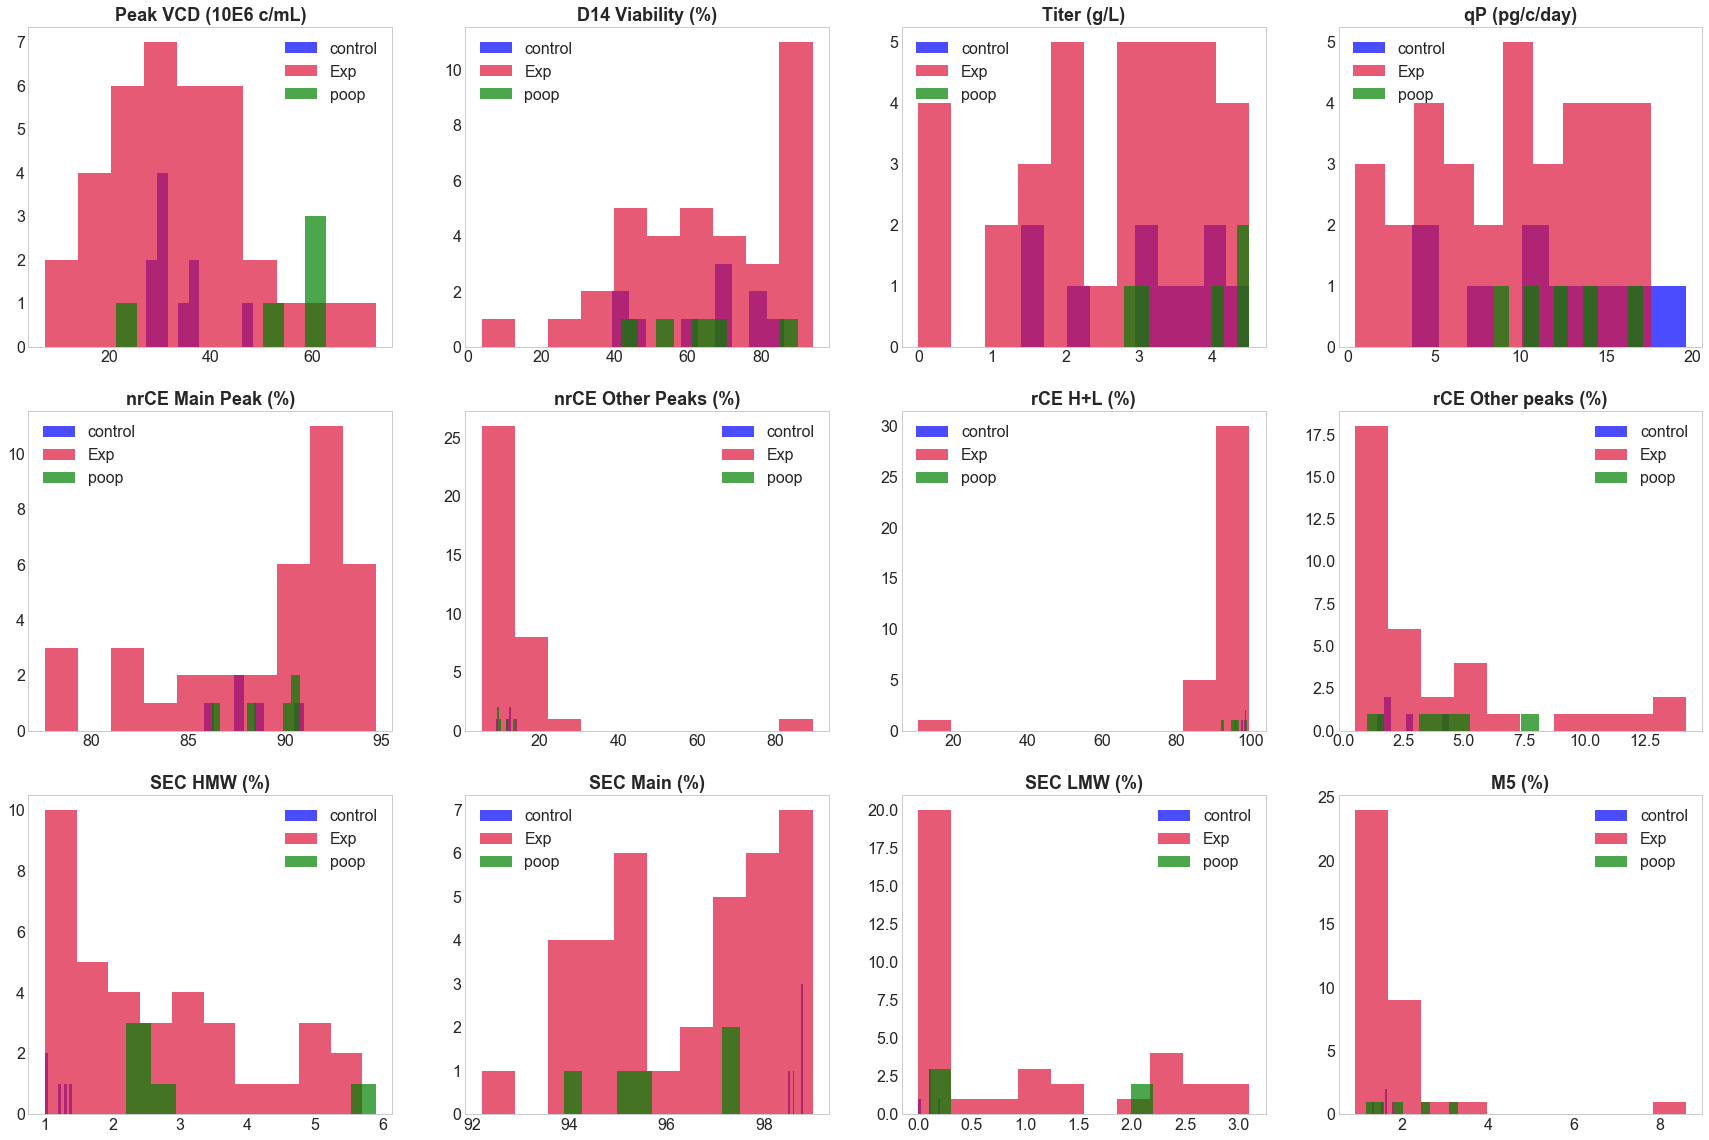

In [191]:
grouped_histograms(df_0, df_1)

Object `pyploy.set_title` not found.


In [24]:
[i for i in color]

['red', 'blue', 'green', 'black']

In [37]:
df_1 = df_outputes.iloc[:,-1]

df_1 = pd.DataFrame(df_1)
df_1["Cond"].unique()

array(['control', 'Exp', 'poop'], dtype=object)

In [ ]:

df_0 = df_outputes.iloc[:,:-1]
type(df_outputes.iloc[:,:-1])

df_1 = df_outputes.iloc[:,-1]
type(df_outputes.iloc[:,-1])


groups = df_1["Cond"].unique()
fig = plt.figure(figsize = (20,20))
n = 0
for i in df_outputes.columns:
    n +=1
    ax = fig.add_subplot(4,4,n)
    for p in groups:
        ax.hist(df_outputes[df_1.iloc[:,0] == p][i].dropna(), alpha = 0.7, label = p)
    plt.legend()
    
    
plt.tight_layout()

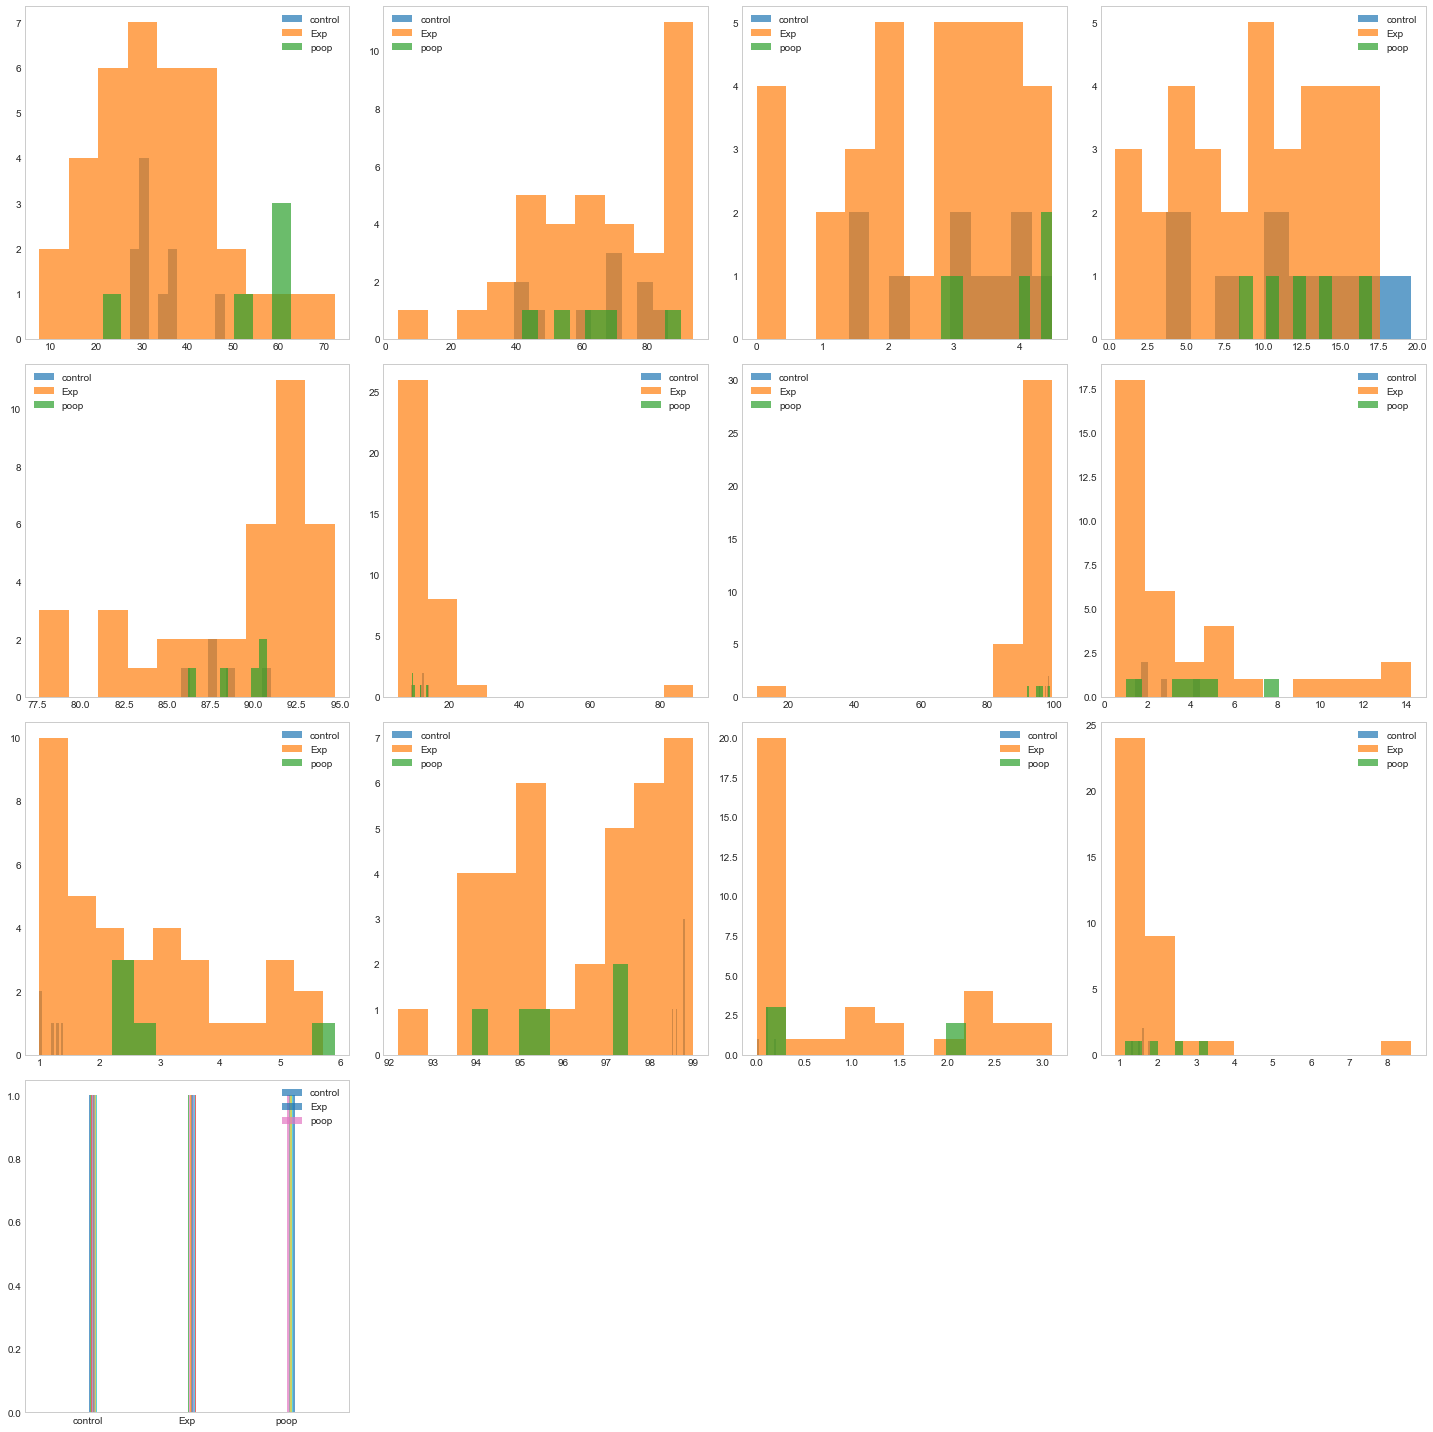

In [22]:

groups = df_outputes["Cond"].unique()
fig = plt.figure(figsize = (20,20))
n = 0
for i in df_outputes.columns:
    n +=1
    ax = fig.add_subplot(4,4,n)
    for p in groups:
        ax.hist(df_outputes[df_outputes["Cond"] == p][i].dropna(), alpha = 0.7, label = p)
    plt.legend()
    
    
plt.tight_layout()

    #print(i)